In [9]:

!pip install pandas matplotlib seaborn numpy

# ✅ Import everything
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Ignore unnecessary warnings
warnings.filterwarnings('ignore')

# Optional: better plot style
sns.set(style="whitegrid")


In [10]:
# Replace with your Sentiment140 CSV file path
df = pd.read_csv("C:/Users/anshs/Downloads/archive/sentiment140.csv.csv", encoding='latin-1', header=None)
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
df = df[['target', 'text']]
df.head()


,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [11]:
df['sentiment'] = df['target'].map({0: 'Negative', 2: 'Neutral', 4: 'Positive'})
df.drop('target', axis=1, inplace=True)
df.head()


,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,is upset that he can't update his Facebook by ...,Negative
2,@Kenichan I dived many times for the ball. Man...,Negative
3,my whole body feels itchy and like its on fire,Negative
4,"@nationwideclass no, it's not behaving at all....",Negative


In [12]:
print("✅ Total Tweets:", len(df))
print("\nSentiment Counts:\n", df['sentiment'].value_counts())


✅ Total Tweets: 1600000

Sentiment Counts:
 sentiment
Negative    800000
Positive    800000
Name: count, dtype: int64


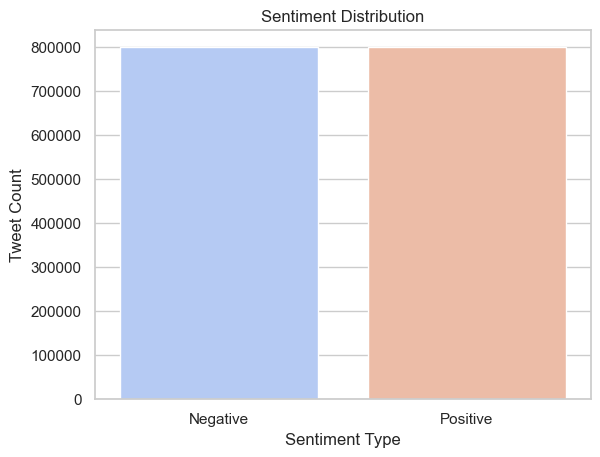

In [13]:
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='coolwarm', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Tweet Count")
plt.show()


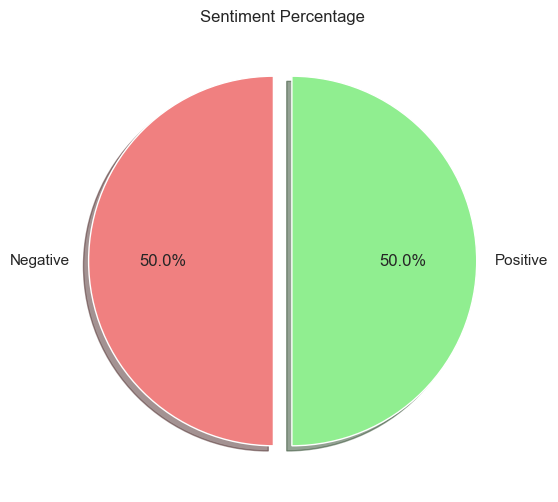

In [15]:


sentiment_counts = df['sentiment'].value_counts()


explode = [0.05] * len(sentiment_counts)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    colors=['lightcoral', 'lightgreen', 'skyblue'][:len(sentiment_counts)],  # trim if fewer sentiments
    startangle=90,
    explode=explode,
    shadow=True
)
plt.title("Sentiment Percentage")
plt.ylabel('')
plt.show()



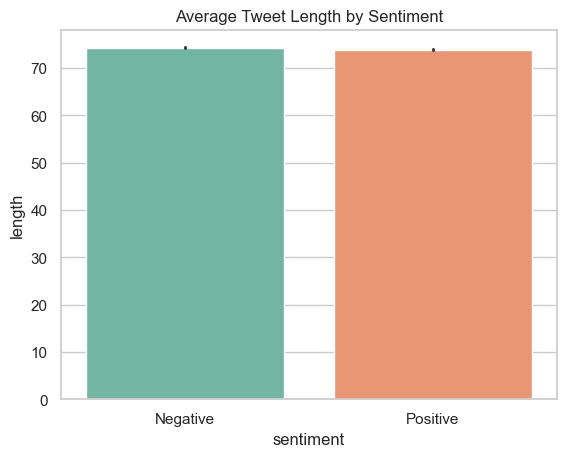

In [16]:
df['length'] = df['text'].apply(len)
sns.barplot(data=df, x='sentiment', y='length', hue='sentiment', palette='Set2', legend=False)
plt.title("Average Tweet Length by Sentiment")
plt.show()


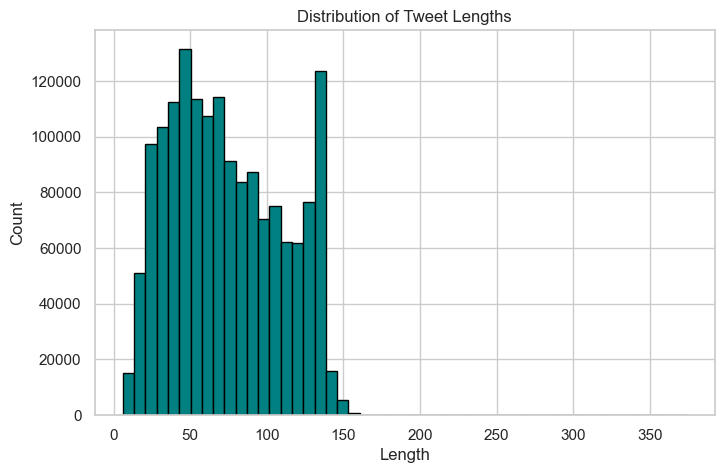

In [17]:
plt.figure(figsize=(8,5))
plt.hist(df['length'], bins=50, color='teal', edgecolor='black')
plt.title("Distribution of Tweet Lengths")
plt.xlabel("Length")
plt.ylabel("Count")
plt.show()


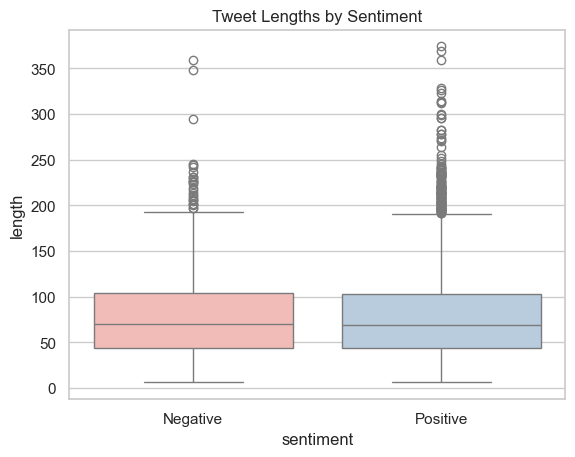

In [18]:
sns.boxplot(data=df, x='sentiment', y='length', hue='sentiment', palette='Pastel1', legend=False)
plt.title("Tweet Lengths by Sentiment")
plt.show()


In [20]:
ory
for s in ['Positive', 'Neutral', 'Negative']:
    print(f"\n🔹 Example {s} Tweet:")
    
 
    subset = df[df['sentiment'] == s]
    
    
    if len(subset) > 0:
        print(subset['text'].iloc[0])
    else:
        print(f"(No {s} tweets found in this dataset)")



🔹 Example Positive Tweet:
I LOVE @Health4UandPets u guys r the best!! 

🔹 Example Neutral Tweet:
(No Neutral tweets found in this dataset)

🔹 Example Negative Tweet:
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D


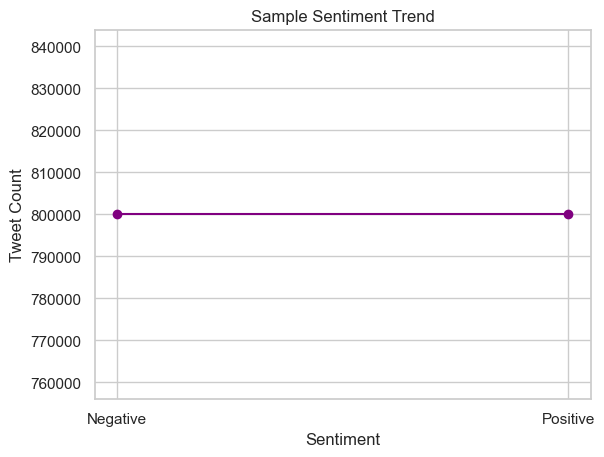

In [21]:
trend_data = df['sentiment'].value_counts()
plt.plot(trend_data.index, trend_data.values, marker='o', color='purple')
plt.title("Sample Sentiment Trend")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.grid(True)
plt.show()


In [22]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_percent = sentiment_counts / sentiment_counts.sum() * 100
percent_df = pd.DataFrame({'Sentiment': sentiment_percent.index, 'Percentage': sentiment_percent.values})
percent_df


,Sentiment,Percentage
0,Negative,50.0
1,Positive,50.0


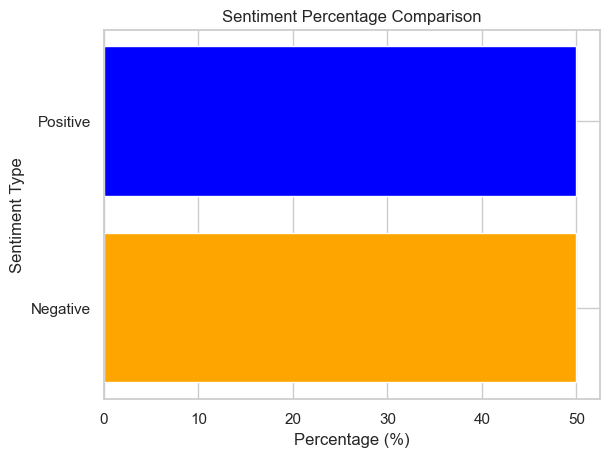

In [23]:
plt.barh(percent_df['Sentiment'], percent_df['Percentage'], color=['orange', 'blue', 'green'])
plt.title("Sentiment Percentage Comparison")
plt.xlabel("Percentage (%)")
plt.ylabel("Sentiment Type")
plt.show()


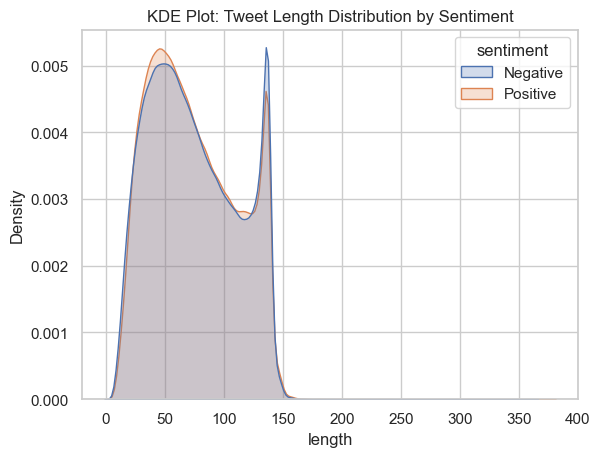

In [24]:
sns.kdeplot(data=df, x='length', hue='sentiment', fill=True)
plt.title("KDE Plot: Tweet Length Distribution by Sentiment")
plt.show()


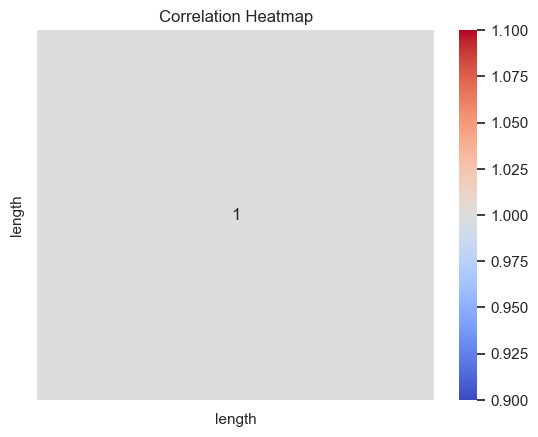

In [25]:
corr = df[['length']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [26]:
summary = df.groupby('sentiment')['length'].agg(['mean', 'max', 'min', 'count']).reset_index()
print("📊 Sentiment Summary:")
display(summary)


📊 Sentiment Summary:


,sentiment,mean,max,min,count
0,Negative,74.301790,359,6,800000
1,Positive,73.878433,374,6,800000
